In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib.patches import Patch

In [46]:

def clean(dfs):
    
    for season in dfs:
        
        for num, t in enumerate(dfs[season]):
        
            if num == 0:
                dfs[season][0].index = dfs[season][0].Squad
                dfs[season][0] = dfs[season][0].drop(columns = ['Squad', 'Goalkeeper', 'Notes', 'W', 'L', 'D', 'MP', 
                                                                'GF', 'GA', 'GD', 'Pts', 'xG', 'xGA', 'xGD/90', 'Attendance'])
                
                ok = [i[i.index('-')+2:] for i in dfs[season][0]['Top Team Scorer']]

                goals = []
                for i in ok:
                    if '-' in i:
                        goals.append(int(i[i.index('-')+2:]))
                    else:
                        goals.append(int(i))
                dfs[season][0]['top_scorer_goals'] = goals
                dfs[season][0] = dfs[season][0].drop(columns = ['Top Team Scorer'])
                
                dfs[season][0] = dfs[season][0].sort_index()
            
            else:
                
                squad_column = [i for i in dfs[season][num].columns if 'Squad' in i]
                dfs[season][num].index = dfs[season][num][squad_column[0]]
                dfs[season][num].index.name = 'Squad'
                dfs[season][num] = dfs[season][num].drop(columns = [squad_column[0]])
                dfs[season][num] = dfs[season][num].drop(columns = [i for i in dfs[season][num].columns if 'G' in i[1]])
                dfs[season][num] = dfs[season][num].drop(columns = [i for i in dfs[season][num].columns if 'A' in i[1] and i[1] != 'Age' and i[1] != 'PPA' and i[1] != 'CrsPA' and i[1] != 'CPA'])
                dfs[season][num] = dfs[season][num].drop(columns = [i for i in dfs[season][num].columns if 'Pts' in i[1]])
                dfs[season][num] = dfs[season][num].drop(columns = [i for i in dfs[season][num].columns if 'W' in i[1]])
                dfs[season][num] = dfs[season][num].drop(columns = [i for i in dfs[season][num].columns if 'L' in i[1]])
                dfs[season][num] = dfs[season][num].drop(columns = [i for i in dfs[season][num].columns if 'D' in i[1]])
                dfs[season][num] = dfs[season][num].drop(columns = [i for i in dfs[season][num].columns if 'MP' in i[1]])
                dfs[season][num] = dfs[season][num].drop(columns = [i for i in dfs[season][num].columns if 'Starts' in i[1]])
                dfs[season][num] = dfs[season][num].drop(columns = [i for i in dfs[season][num].columns if i[1] == '90s'])
                dfs[season][num] = dfs[season][num].drop(columns = [i for i in dfs[season][num].columns if i[1] == 'Min'])
                dfs[season][num] = dfs[season][num].drop(columns = [i for i in dfs[season][num].columns if i[1] == 'Starts'])
                dfs[season][num] = dfs[season][num].drop(columns = [i for i in dfs[season][num].columns if i[1] == 'Compl'])
                dfs[season][num] = dfs[season][num].drop(columns = [i for i in dfs[season][num].columns if i[1] == 'Save%'])
                dfs[season][num] = dfs[season][num].drop(columns = [i for i in dfs[season][num].columns if i[1] == 'Penalty Kicks'])
                dfs[season][num] = dfs[season][num].drop(columns = [i for i in dfs[season][num].columns if i[1] == 'MP'])
                dfs[season][num] = dfs[season][num].drop(columns = [i for i in dfs[season][num].columns if 'PK' in i[1]])
                dfs[season][num] = dfs[season][num].drop(columns = [i for i in dfs[season][num].columns if 'SCA' in i[0]])
                dfs[season][num] = dfs[season][num].drop(columns = [i for i in dfs[season][num].columns if 'GCA' in i[0]])
                dfs[season][num] = dfs[season][num].drop(columns = [i for i in dfs[season][num].columns if i[1] == 'Min%'])
                dfs[season][num] = dfs[season][num].drop(columns = [i for i in dfs[season][num].columns if i[1] ==  'Mn/Start'])
                dfs[season][num] = dfs[season][num].drop(columns = [i for i in dfs[season][num].columns if i[0] == 'Team Success'])
                
                
                if num > 2:
                    
                    dfs[season][num] = dfs[season][num].drop(columns = [i for i in dfs[season][num].columns if i[1] == '# Pl' and i[0] != "Dribbles"])
                    dfs[season][num] = dfs[season][num].drop(columns = [i for i in dfs[season][num].columns if i[1] == 'Poss'])
                    dfs[season][num] = dfs[season][num].drop(columns = [i for i in dfs[season][num].columns if i[1] == 'Age'])
                    
    
    return dfs


def remove_duplicates(df):
    
    return df.loc[:,~df.columns.duplicated()]


def normalize(df):
    
    mm = MinMaxScaler()
    ok = df.copy()

    cool = pd.DataFrame(mm.fit_transform(ok.drop(columns = ['Rk', 'league'])), index = ok.index, columns = [i for i in ok.drop(columns = ['Rk', 'league'])])
    cool['Rk'] = ok['Rk']
    cool['league'] = ok['league']

    return cool


def set_data(frames, league_name = None):
    
    assert league_name
    
    cleaned_frame = clean(frames.copy())
    
    finished_frame = { year : [cleaned_frame[year][num] for num, i in enumerate(cleaned_frame[year]) if num % 2 == 0] for year in years}
    
    connected_data_frame = { year : pd.concat([i for i in finished_frame[year]], axis = 1) for year in years}

    for i in connected_data_frame:
        connected_data_frame[i]['league'] = 'premier'
    
    return connected_data_frame

'''

cleaned_prem = clean(frames_prem.copy())
cleaned_serie = clean(frames_serie.copy())
cleaned_liga = clean(frames_liga.copy())
cleaned_bundes = clean(frames_bundes.copy())
cleaned_ligue = clean(frames_ligue.copy())

finished_prem = { year : [cleaned_prem[year][num] for num, i in enumerate(cleaned_prem[year]) if num % 2 == 0] for year in years}
finished_serie = { year : [cleaned_serie[year][num] for num, i in enumerate(cleaned_serie[year]) if num % 2 == 0] for year in years}
finished_liga = { year : [cleaned_liga[year][num] for num, i in enumerate(cleaned_liga[year]) if num % 2 == 0] for year in years}
finished_bundes = { year : [cleaned_bundes[year][num] for num, i in enumerate(cleaned_bundes[year]) if num % 2 == 0] for year in years}
finished_ligue = { year : [cleaned_ligue[year][num] for num, i in enumerate(cleaned_ligue[year]) if num % 2 == 0] for year in years}
'''

In [51]:

numbers_prem = [10728, 3232, 1889, 1631]
numbers_serie = [10730, 3260, 1896, 1640]
numbers_liga = [10731, 3239, 1886, 1652]
numbers_bundes = [10737, 3248, 2109, 1634]
numbers_ligue = [10732, 3243, 2104, 1632]

years = ["2020-2021", "2019-2020", "2018-2019", "2017-2018"]

frames_prem = {}
frames_serie = {}
frames_liga = {}
frames_bundes = {}
frames_ligue = {}

for p, s, l, b, one, y in zip(numbers_prem, numbers_serie, numbers_liga, numbers_bundes, numbers_ligue, years):
    frames_prem[y] = pd.read_html(f"https://fbref.com/en/comps/9/{p}/{y}-Premier-League-Stats")
    frames_serie[y] = pd.read_html(f"https://fbref.com/en/comps/11/{s}/{y}-Serie-A-Stats")
    frames_liga[y] = pd.read_html(f"https://fbref.com/en/comps/12/{l}/{y}-La-Liga-Stats")
    frames_bundes[y] = pd.read_html(f"https://fbref.com/en/comps/20/{b}/{y}-Bundesliga-Stats")
    frames_ligue[y] = pd.read_html(f"https://fbref.com/en/comps/13/{one}/{y}-Ligue-1-Stats")
    
    




2020-2021
2019-2020
2018-2019
2017-2018


'\n\ncleaned_prem = clean(frames_prem.copy())\ncleaned_serie = clean(frames_serie.copy())\ncleaned_liga = clean(frames_liga.copy())\ncleaned_bundes = clean(frames_bundes.copy())\ncleaned_ligue = clean(frames_ligue.copy())\n\nfinished_prem = { year : [cleaned_prem[year][num] for num, i in enumerate(cleaned_prem[year]) if num % 2 == 0] for year in years}\nfinished_serie = { year : [cleaned_serie[year][num] for num, i in enumerate(cleaned_serie[year]) if num % 2 == 0] for year in years}\nfinished_liga = { year : [cleaned_liga[year][num] for num, i in enumerate(cleaned_liga[year]) if num % 2 == 0] for year in years}\nfinished_bundes = { year : [cleaned_bundes[year][num] for num, i in enumerate(cleaned_bundes[year]) if num % 2 == 0] for year in years}\nfinished_ligue = { year : [cleaned_ligue[year][num] for num, i in enumerate(cleaned_ligue[year]) if num % 2 == 0] for year in years}\n'

In [50]:

set_data(frames_prem, 'premier')

#frames_prem['2020-2021'][0]

,Rk,xGD,top_scorer_goals
Squad,,,
Arsenal,8,9.2,13
Aston Villa,11,0.1,14
Brighton,16,13.9,8
Burnley,17,-17.7,12
Chelsea,4,31.2,7
Crystal Palace,14,-25.0,11
Everton,10,-4.9,16
Fulham,18,-11.7,5
Leeds United,9,-5.4,17


In [42]:

connected_data_prem = { year : pd.concat([i for i in finished_prem[year]], axis = 1) for year in years}

for i in connected_data_prem:
    connected_data_prem[i]['league'] = 'premier'
    
connected_data_serie = { year : pd.concat([i for i in finished_serie[year]], axis = 1) for year in years}

for i in connected_data_serie:
    connected_data_serie[i]['league'] = 'serie_a'
    
connected_data_liga = { year : pd.concat([i for i in finished_liga[year]], axis = 1) for year in years}

for i in connected_data_liga:
    connected_data_liga[i]['league'] = 'la_liga'
    
connected_data_bundes = { year : pd.concat([i for i in finished_bundes[year]], axis = 1) for year in years}

for i in connected_data_bundes:
    connected_data_bundes[i]['league'] = 'bundesliga'

connected_data_ligue = { year : pd.concat([i for i in finished_ligue[year]], axis = 1) for year in years}

for i in connected_data_ligue:
    connected_data_ligue[i]['league'] = 'ligue_1'

connected_football_data = pd.DataFrame()

for year in years:
    
    connected_football_data = pd.concat([connected_football_data, remove_duplicates(normalize(connected_data_prem[year]))])
    connected_football_data = pd.concat([connected_football_data, remove_duplicates(normalize(connected_data_serie[year]))])
    connected_football_data = pd.concat([connected_football_data, remove_duplicates(normalize(connected_data_liga[year]))])
    connected_football_data = pd.concat([connected_football_data, remove_duplicates(normalize(connected_data_bundes[year]))])
    connected_football_data = pd.concat([connected_football_data, remove_duplicates(normalize(connected_data_ligue[year]))])

for num, col in enumerate(connected_football_data):

    if type(col) == tuple and "Unnamed" in col[0]:
        connected_football_data = connected_football_data.rename(columns = {col : col[1]})


#connected_football_data = connected_football_data.reset_index(drop=True)

connected_football_data = connected_football_data.dropna(axis = 1)

connected_football_data



/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dty

,xGD,top_scorer_goals,# Pl,Age,Poss,"(Performance, Saves)","(Performance, CS)","(Performance, CS%)","(Goals, FK)","(Goals, CK)",...,"(Subs, unSub)","(Performance, 2CrdY)","(Performance, Fls)","(Performance, Fld)","(Performance, Off)","(Performance, Crs)","(Performance, Int)","(Performance, Recov)",Rk,league
Squad,,,,,,,,,,,,,,,,,,,,,
Arsenal,0.568421,0.444444,0.857143,0.179487,0.615970,0.287129,0.500000,0.500000,0.00,0.181818,...,0.071429,0.25,0.000000,0.430000,0.590909,0.796875,0.000000,0.219059,8,premier
Aston Villa,0.448684,0.500000,0.142857,0.000000,0.399240,0.693069,0.714286,0.714674,1.00,0.090909,...,0.738095,1.00,0.562162,1.000000,0.727273,0.835938,0.242424,0.440594,11,premier
Brighton,0.630263,0.166667,0.571429,0.153846,0.520913,0.138614,0.500000,0.500000,0.00,0.545455,...,0.238095,0.50,0.481081,0.230000,0.318182,0.621094,0.351515,0.650990,16,premier
Burnley,0.214474,0.388889,0.285714,0.794872,0.155894,0.613861,0.428571,0.426630,0.00,0.727273,...,0.880952,0.00,0.351351,0.346667,1.000000,0.492188,0.375758,0.884901,17,premier
Chelsea,0.857895,0.111111,0.571429,0.205128,0.904943,0.049505,0.928571,0.929348,0.50,0.181818,...,0.238095,0.25,0.567568,0.363333,0.931818,0.769531,0.648485,0.419554,4,premier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rennes,0.290023,0.142857,0.384615,0.326531,0.319672,0.461538,0.428571,0.428184,0.25,0.666667,...,0.631579,0.60,0.370166,0.880952,0.750000,0.573394,0.625000,0.693504,5,ligue_1
Saint-Étienne,0.342227,0.000000,0.538462,0.816327,0.360656,0.769231,0.642857,0.642276,0.75,0.333333,...,0.315789,0.20,0.458564,0.726190,0.772727,0.348624,0.375000,0.508692,7,ligue_1
Strasbourg,0.216937,0.000000,0.153846,0.938776,0.278689,0.492308,0.000000,0.000000,0.00,0.777778,...,0.210526,0.20,0.618785,0.351190,0.477273,0.435780,0.805556,0.605672,15,ligue_1


In [44]:

connected_football_data.to_excel("TOTAL_DATA_FINAL.xlsx")

#connected_football_data


In [31]:


connected_data_bundes['2020-2021']



,Rk,xGD,top_scorer_goals,"(Unnamed: 1_level_0, # Pl)","(Unnamed: 2_level_0, Age)","(Unnamed: 3_level_0, Poss)","(Performance, CrdY)","(Performance, CrdR)","(Performance, Saves)","(Performance, CS)",...,"(Subs, unSub)","(Performance, CrdY)","(Performance, CrdR)","(Performance, 2CrdY)","(Performance, Fls)","(Performance, Fld)","(Performance, Off)","(Performance, Crs)","(Performance, Int)","(Performance, Recov)"
Squad,,,,,,,,,,,,,,,,,,,,,
Arminia,15,-25.0,5,26,26.0,42.2,52,1,119,11,...,157,52,1,0,436,442,53,290,305,3164
Augsburg,13,-19.4,8,25,27.0,41.3,70,4,124,7,...,159,70,4,3,441,446,73,313,437,3072
Bayern Munich,1,34.8,41,29,27.3,61.1,44,3,85,9,...,163,44,3,0,346,430,76,566,415,3235
Dortmund,3,28.3,27,26,25.6,59.8,44,1,90,11,...,163,44,1,1,403,435,68,400,401,3109
Eint Frankfurt,5,7.7,28,25,27.2,54.0,82,1,102,4,...,165,82,1,1,527,401,70,510,426,3427
Freiburg,10,-7.5,9,24,26.2,47.0,62,0,122,6,...,151,62,0,0,497,441,58,444,387,2931
Hertha BSC,14,-4.6,7,32,25.4,49.4,67,3,90,9,...,157,67,3,2,513,487,79,396,409,2918
Hoffenheim,11,-1.6,20,30,25.7,51.1,68,4,91,6,...,166,68,4,2,496,464,50,440,346,3247
Köln,16,-16.2,7,28,24.9,46.3,63,1,100,5,...,157,63,1,1,485,471,59,428,427,3100


In [484]:

      

football_data = football_data.dropna(axis=1)

cutoff = int(len(football_data)*.5)

football_train = football_data[:cutoff]
football_test = football_data[cutoff:]

football_data.columns

Index(['Rk', 'top_scorer_goals', 'Age', 'Poss', 'SoTA', 'Saves', 'Save%', 'CS',
       'PSxG/SoT', 'G/Sh', 'G/SoT', 'Dist', 'FK', '1/3', 'PPA', 'CrsPA',
       'Prog', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Succ', 'Att',
       'Succ%', '#Pl', 'Megs', 'Carries', 'TotDist', 'PrgDist', 'Prog.1',
       '1/3.1', 'CPA', 'Mis', 'Dis'],
      dtype='object')

In [401]:

# (football_data["Rk"].values > 7) & (football_data["Rk"].values <= 17),
top_4_or_not = np.select([football_data["Rk"].values <= 4, 
                          (football_data["Rk"].values > 4) & (football_data["Rk"].values <= 17),
                          football_data["Rk"].values > 17], [1,2,3])

# football_train["Rk"].values
# top_4_or_not[:cutoff]
X_train = football_train[[i for i in football_test.columns if i != "Rk"]].values
Y_train = top_4_or_not[:cutoff]

X_test = football_test[[i for i in football_test.columns if i != "Rk"]].values
Y_test = top_4_or_not[cutoff:]

forest = RandomForestClassifier().fit(X_train, Y_train)


Text(114.0, 0.5, 'Actual')

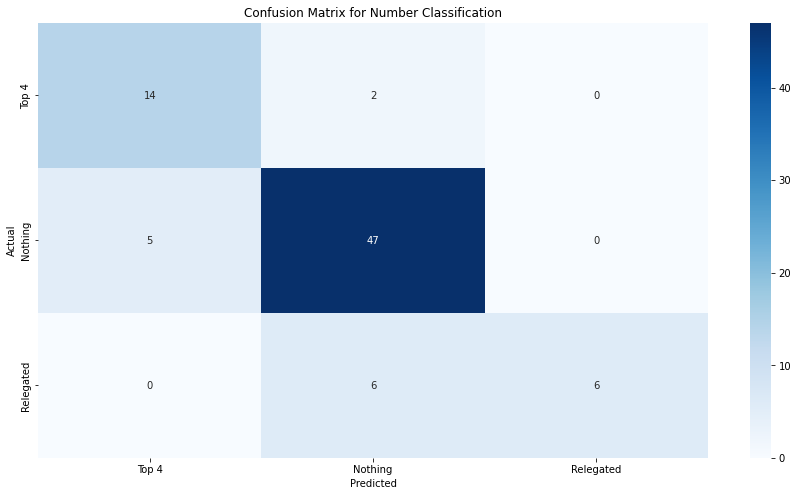

In [402]:

preds = forest.predict(X_test)
confusion = confusion_matrix(Y_test, preds)

plt.figure(figsize=(15,8))
fig = sns.heatmap(confusion, annot=True, cmap='Blues')
#fig.set_xticklabels([i for i in range(1,21)])
#fig.set_yticklabels([i for i in range(1,21)])
fig.set_xticklabels(['Top 4', 'Nothing', 'Relegated'])
fig.set_yticklabels(['Top 4', 'Nothing', 'Relegated'])
fig.set_title("Confusion Matrix for Number Classification")
fig.set_xlabel("Predicted")
fig.set_ylabel("Actual")

In [398]:


correct = [i for num, (i, j) in enumerate(zip(preds, Y_test)) if i == j and i < 5]

t4_all = [i for num, (i, j) in enumerate(zip(preds, Y_test)) if j < 5]


len(correct) / len(t4_all)



0.5

In [377]:


reg = LinearRegression().fit(X_train, Y_train)

stds = np.array(football_train[[i for i in football_test.columns if i != "Rk"]].std().to_list())

impact = reg.coef_ * stds


In [378]:

impact_frame = pd.DataFrame(impact).T
impact_frame.columns = [i for i in football_test.columns if i != "Rk"]

impact_frame.T

,0
top_scorer_goals,-0.113193
Age,-0.008813
Poss,0.282427
SoTA,0.533266
Saves,-0.177186
Save%,-0.027338
CS,-0.104350
PSxG/SoT,0.031962
G/Sh,-0.666978
G/SoT,0.470073


Text(0, 0.5, 'SoTA')

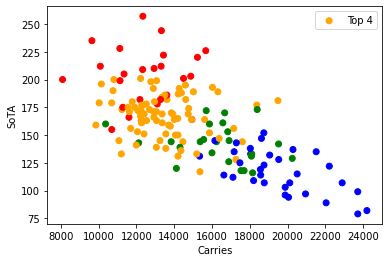

In [379]:


colors = {1 : "blue", 2: 'green', 3 : "orange", 4 : "red"}

legend_elements = [Patch(facecolor=c[1], edgecolor='k', label=c[0]) for c in colors.items()]



